<a href="https://colab.research.google.com/github/AtefehT1403/practice/blob/main/knn2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

دقت مدل: 0.97
ماتریس اشتباهات (مقادیر عددی):
[[10  0  0]
 [ 0  9  0]
 [ 0  1 10]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.90      1.00      0.95         9
   virginica       1.00      0.91      0.95        11

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



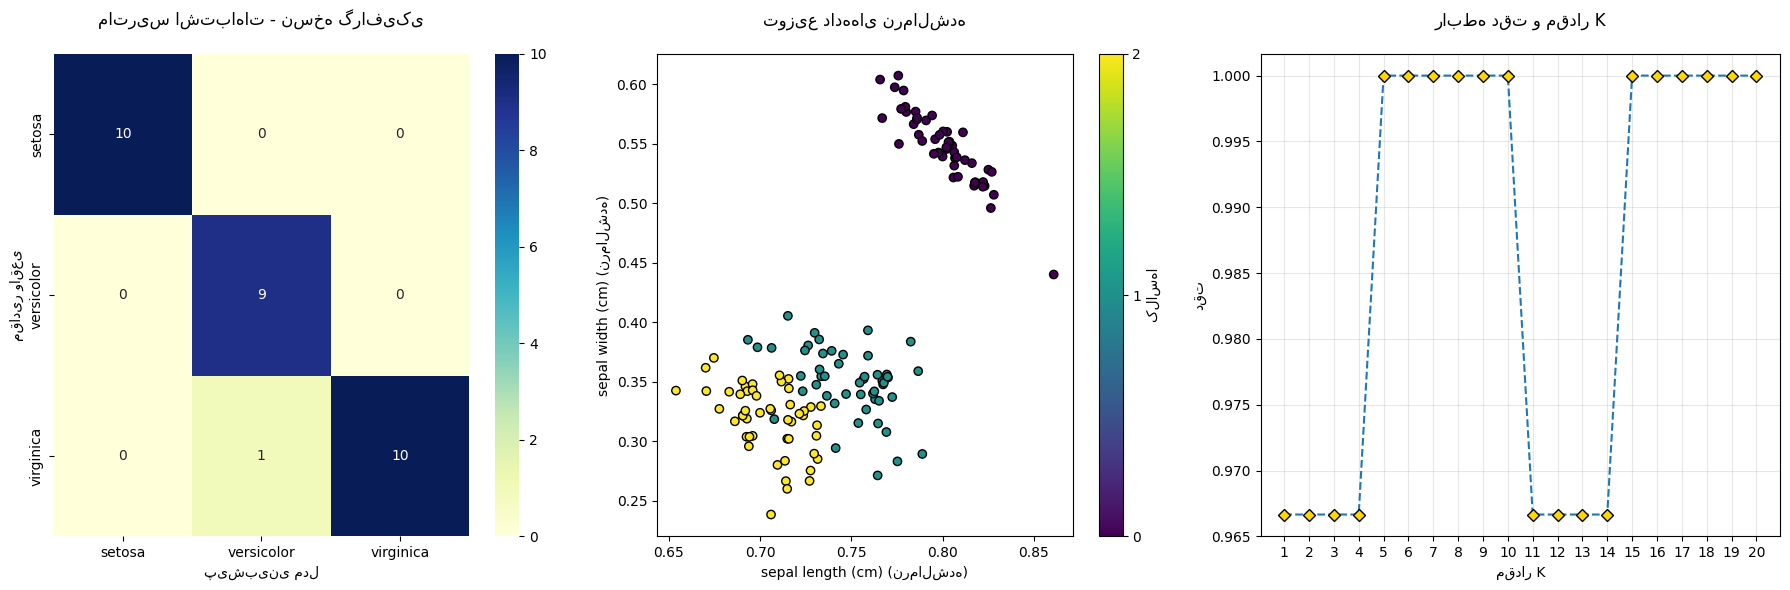

In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import normalize
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# بارگیری و پیش‌پردازش داده‌ها
iris = load_iris()
X = iris.data
y = iris.target

# نرمالسازی داده‌ها
X_normalized = normalize(X, norm='l2')  # نرمالسازی L2

# تقسیم داده‌ها
X_train, X_test, y_train, y_test = train_test_split(
    X_normalized, y, test_size=0.2, random_state=42
)

# آموزش مدل
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# محاسبه دقت و ماتریس اشتباهات
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("="*50)
print(f"دقت مدل: {accuracy:.2f}")
print("="*50)
print("ماتریس اشتباهات (مقادیر عددی):")
print(conf_matrix)
print("="*50)
print(classification_report(y_test, y_pred, target_names=iris.target_names))

# بخش گرافیکی
plt.figure(figsize=(18, 6))

# 1. ماتریس اشتباهات گرافیکی
plt.subplot(1, 3, 1)
sns.heatmap(conf_matrix,
            annot=True,
            fmt="d",
            cmap="YlGnBu",
            xticklabels=iris.target_names,
            yticklabels=iris.target_names)
plt.title("ماتریس اشتباهات - نسخه گرافیکی", fontsize=12, pad=20)
plt.xlabel("پیش‌بینی مدل")
plt.ylabel("مقادیر واقعی")

# 2. نمودار پراکندگی (دو ویژگی اول نرمال‌شده)
plt.subplot(1, 3, 2)
scatter = plt.scatter(X_normalized[:, 0],
                      X_normalized[:, 1],
                      c=y,
                      cmap='viridis',
                      edgecolor='k')
plt.colorbar(scatter, ticks=[0, 1, 2], label='کلاس‌ها')
plt.xlabel(f"{iris.feature_names[0]} (نرمال‌شده)")
plt.ylabel(f"{iris.feature_names[1]} (نرمال‌شده)")
plt.title("توزیع داده‌های نرمال‌شده", fontsize=12, pad=20)

# 3. نمودار دقت براساس مقدار K
plt.subplot(1, 3, 3)
k_range = range(1, 21)
accuracies = [KNeighborsClassifier(n_neighbors=k)
              .fit(X_train, y_train)
              .score(X_test, y_test)
              for k in k_range]

plt.plot(k_range, accuracies, marker='D', mfc='gold', mec='k', linestyle='--')
plt.xticks(k_range)
plt.xlabel("مقدار K", fontsize=10)
plt.ylabel("دقت", fontsize=10)
plt.title("رابطه دقت و مقدار K", fontsize=12, pad=20)
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()
